<a href="https://colab.research.google.com/github/quantumhome/DataAnalysisCaseStudy/blob/master/25thMay_SolarPowerEfficiency_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project / Case Study: Solar Power Efficiency**

**Dataset: https://drive.google.com/file/d/1H_CxV_-wMcha1btWHaDVQPK0YAVZihY4/view?usp=sharing**

<hr>

**Given a dataset containing timestamped measurements of ambient air temperature, dew point, surface albedo, atmospheric pressure, wind direction, wind speed, fill flag, total column ozone, cloud type, solar zenith angle, precipitable water, and relative humidity, the objective is to build a machine learning regression model. This model will predict the values of:**

* **Clearsky DNI (Direct Normal Irradiance)**
* **Clearsky GHI (Global Horizontal Irradiance)**
* **Clearsky DHI (Diffuse Horizontal Irradiance)**

**The model will leverage the provided independent features to forecast these solar radiation parameters, which are crucial for optimizing solar energy systems and assessing solar resource availability. This will enable improved efficiency in solar energy generation and better planning for solar energy projects.**

<hr>

* **Timestamp: This column indicates the exact date and time when the measurements were recorded. The format MM-DD-YYYY HH:MM (e.g., 01-01-2019 00:00) suggests data points are collected at 10-minute intervals.**

* **Temperature: This is the ambient air temperature, likely measured in degrees Celsius, at the time of observation.**

* **Dew Point: The dew point temperature, also likely in degrees Celsius, is the temperature to which air must be cooled to become saturated with water vapor. It's a good indicator of atmospheric moisture content.**

* **Surface Albedo: This value represents the reflectivity of the Earth's surface at the location of the sensor. It's a dimensionless quantity ranging from 0 (perfectly absorbing) to 1 (perfectly reflective). For example, snow has a high albedo, while asphalt has a low albedo.**

* **Pressure: This is the atmospheric pressure, likely measured in hectopascals (hPa) or millibars (mb). It indicates the weight of the air column above the sensor.**

* **Wind Direction: This column indicates the direction from which the wind is blowing, typically measured in degrees clockwise from true North (e.g., 0° for North, 90° for East, 180° for South, 270° for West).**

* **Wind Speed: This is the speed of the wind, likely measured in meters per second (m/s) or kilometers per hour (km/h).**

* **Clearsky DHI (Diffuse Horizontal Irradiance): This represents the amount of solar radiation received on a horizontal surface from the sky (scattered radiation), assuming a perfectly clear sky (no clouds or aerosols). It's typically measured in Watts per square meter (W/m2).**

* **Clearsky DNI (Direct Normal Irradiance): This is the amount of solar radiation received per unit area by a surface that is always held perpendicular (normal) to the rays of the sun, assuming a perfectly clear sky. It's also measured in Watts per square meter (W/m 2). This is the solar radiation that casts sharp shadows.**

* **Clearsky GHI (Global Horizontal Irradiance): This is the total amount of solar radiation received on a horizontal surface, assuming a perfectly clear sky. It's the sum of Clearsky DHI and the horizontal component of Clearsky DNI. Measured in Watts per square meter (W/m 2).**

* **Fill Flag: This column likely indicates the quality or status of the data for that particular row. A value of '0' might mean the data is valid, while other values could indicate missing data, interpolated data, or data collected under specific conditions. Further documentation would be needed to fully understand its meaning.**

* **Ozone: This represents the total column ozone concentration in the atmosphere above the sensor, typically measured in Dobson Units (DU). Ozone plays a crucial role in absorbing ultraviolet (UV) radiation.**

* **Cloud Type: This column likely categorizes the type of clouds present at the time of observation. The value '1' in the example might correspond to a specific cloud type (e.g., clear, cirrus, cumulus). A lookup table or further documentation would be needed to interpret the numerical codes.**

* **Solar Zenith Angle: This is the angle between the sun's rays and the local vertical. A solar zenith angle of 0° means the sun is directly overhead, while 90° means the sun is on the horizon. Values greater than 90° indicate the sun is below the horizon (nighttime).**

* **Precipitable Water: This represents the total amount of water vapor contained in a vertical column of the atmosphere, typically measured in centimeters (cm) or millimeters (mm). It's an indicator of atmospheric humidity.**

* **Relative Humidity: This is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature. It's expressed as a percentage and indicates how saturated the air is with moisture.**

## **Procedure to work with Problem Statement**

* **Data Inspection and Insights**
* **Data Processing**
* **Selecting the algorithms**
* **Select the features**
* **Train and testing subsets**
* **Work the training of the model**

### **Requirement Phase**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

### **Data Ingestion Phase**

In [ ]:
df = pd.read_csv("/content/SolarData.csv")

#### **Data Inspection Phase**

In [ ]:
df.head()

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91


#### **Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           210240 non-null  object 
 1   Temperature         210240 non-null  float64
 2   Dew Point           210240 non-null  float64
 3   Surface Albedo      210240 non-null  float64
 4   Pressure            210240 non-null  int64  
 5   Wind Direction      210240 non-null  int64  
 6   Wind Speed          210240 non-null  float64
 7   Clearsky DHI        210240 non-null  int64  
 8   Clearsky DNI        210240 non-null  int64  
 9   Clearsky GHI        210240 non-null  int64  
 10  Fill Flag           210240 non-null  int64  
 11  Ozone               210240 non-null  float64
 12  Cloud Type          210240 non-null  int64  
 13  Solar Zenith Angle  210240 non-null  float64
 14  Precipitable Water  210240 non-null  float64
 15  Relative Humidity   210240 non-nul

**Timestamp is not necessary since we are not currently working with TSA**

In [ ]:
# pd.to_datetime(df["Timestamp"], infer_datetime_format = "")
df = df.drop("Timestamp", axis = 1)

In [ ]:
df.head()

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91


### **Seperating the target data from the feature data**

In [ ]:
# Feature Columns
X = df.drop(["Clearsky DHI", "Clearsky DNI", "Clearsky GHI"], axis = 1)

# Target Columns 1
y1 = df["Clearsky DHI"]

# Target Columns 2
y2 = df["Clearsky DNI"]

# Target Columns 3
y3 = df["Clearsky GHI"]

### **Data Processing**

#### **Null Values**

In [ ]:
df.isnull().sum().sum()

np.int64(0)

#### **Scaling of the features**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

### **Train and Test Part**

In [ ]:
# DHI Column
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.2, random_state = 42)

# DNI Column
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.2, random_state = 42)

# GHI Column
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, y3, test_size = 0.2, random_state = 42)

#### **Model Building**

##### **DHI Column**

In [ ]:
model_LR1 = LinearRegression()

In [ ]:
model_LR1.fit(x_train1, y_train1)

LinearRegression()

In [ ]:
pred1 = model_LR1.predict(x_test1)

In [ ]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2_score: {r2}")

In [ ]:
evaluate(y_test1, pred1)

MAE: 45.1892922527665
MSE: 3289.0365915036127
RMSE: 57.35012285517454
R2_score: 0.7715606220602033


In [ ]:
res1 = pd.DataFrame(columns= ["Actual", "Predicted"])

In [ ]:
res1["Actual"] = y_test1
res1["Predicted"] = pred1
res1["Error"] = res1["Actual"] - res1["Predicted"]

In [ ]:
res1.head()

,Actual,Predicted,Error
84120,0,36.191100,-36.191100
79806,3,58.752812,-55.752812
75307,0,13.423776,-13.423776
109357,179,218.788627,-39.788627
27886,155,157.636763,-2.636763


##### **DNI Column**

In [ ]:
model_LR2 = LinearRegression()

In [ ]:
model_LR2.fit(x_train2, y_train1)

LinearRegression()

In [ ]:
pred2 = model_LR2.predict(x_test2)

In [ ]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2_score: {r2}")

In [ ]:
evaluate(y_test2, pred2)

MAE: 159.56394057708
MSE: 53957.962340718695
RMSE: 232.2885325209118
R2_score: 0.30511566069762985


In [ ]:
res2 = pd.DataFrame(columns= ["Actual", "Predicted"])

In [ ]:
res2["Actual"] = y_test2
res2["Predicted"] = pred2
res2["Error"] = res2["Actual"] - res2["Predicted"]

In [ ]:
res2.head()

,Actual,Predicted,Error
84120,0,36.191100,-36.191100
79806,0,58.752812,-58.752812
75307,0,13.423776,-13.423776
109357,752,218.788627,533.211373
27886,587,157.636763,429.363237


# **Problem Statement 2**

**We as a machine learning engineer have to build a model that can predict sales based on the money spent on different platforms for marketing**

**Dataset Link: https://drive.google.com/file/d/1i2QOLrx_TOBlhRjiFpolTaE4ePxLjAwX/view?usp=drive_link**

<hr>

# **Step 1 - Import the necessary libraries**

**1. Configuration libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**2. Mandatory ones**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**3. Machine Learning Libraries and evaluations**

In [ ]:
from sklearn.metrics import *  # import everything
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

<hr>

# **Step 2 - Data Loading and Inspection**

In [ ]:
df = pd.read_csv('/content/advertising.csv')

**Data Inspection**

In [ ]:
df.head().style.set_properties(
    **{
        'background-color':'red',
        "color": 'white',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,TV,Radio,Newspaper,Sales
0,230.100000,37.800000,69.200000,22.100000
1,44.500000,39.300000,45.100000,10.400000
2,17.200000,45.900000,69.300000,12.000000
3,151.500000,41.300000,58.500000,16.500000
4,180.800000,10.800000,58.400000,17.900000


In [ ]:
# try!!!
# df.head().style.background_gradient(cmap = 'rainbow')

In [ ]:
a = df.shape
print(f'The rows are : {a[0]} and columns: {a[1]}')

The rows are : 200 and columns: 4


In [ ]:
df.shape

(200, 4)

**Information about the data**

* info(): It will be used for getting the information about the data

* describe(): It will be used when you want statistical summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Bonus: Memory Optimization**

In [ ]:
for x in df.columns:
  df[x] = df[x].astype("float16")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float16
 1   Radio      200 non-null    float16
 2   Newspaper  200 non-null    float16
 3   Sales      200 non-null    float16
dtypes: float16(4)
memory usage: 1.7 KB


Insights:
* There are no null values present
* All the columns are numericals in nature


**Statistical Summary**

In [ ]:
df.describe().T.style.set_properties(
    **{
        'background-color':'blue',
        "color": 'white',
        "border-color":'white',
        'border-style': 'solid'
    }
)

,count,mean,std,min,25%,50%,75%,max
TV,200.000000,147.000000,85.875000,0.700195,74.359375,149.750000,218.812500,296.500000
Radio,200.000000,23.265625,14.851562,0.000000,9.974609,22.898438,36.523438,49.593750
Newspaper,200.000000,30.562500,21.781250,0.300049,12.748047,25.750000,45.093750,114.000000
Sales,200.000000,15.132812,5.285156,1.599609,11.000000,16.000000,19.050781,27.000000


**Insights**
* In most of the situation, we can clearly see that we would be having a normal distribution (2 out of 3 situation)

<hr>

# **Step 3 - Data Cleaning**

In [ ]:
# null values
df.isnull().sum().to_frame().style.set_properties(**{
    "background-color":'red',
    "color":"white",
    'border-color': 'white',
    'border-style': 'solid'
    })

,0
TV,0
Radio,0
Newspaper,0
Sales,0


**Outliers Analysis**

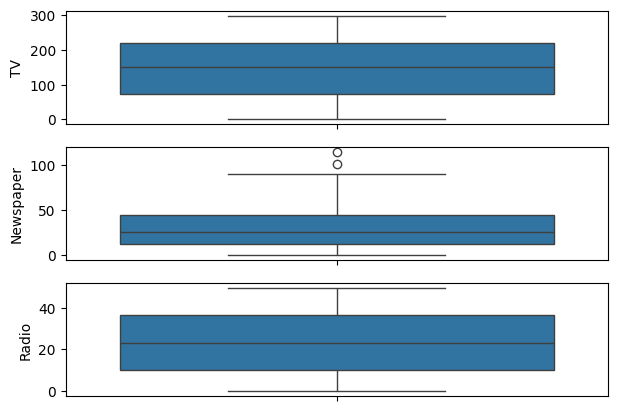

In [ ]:
fig, axs = plt.subplots(3, figsize = (7, 5))

plt1 = sns.boxplot(df['TV'], ax = axs[0])

plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])

plt3 = sns.boxplot(df['Radio'], ax = axs[2])



In [ ]:
import plotly.express as px

In [ ]:
fig = px.box(df['TV'])
fig.show()

In [ ]:
fig = px.box(df['Radio'])
fig.show()

In [ ]:
fig = px.box(df['Newspaper'])
fig.show()

Insights

* Since there are very less number of outlier, we can neglect it

<hr>

# **Step 4 - EDA**

**Correlation check ✅**

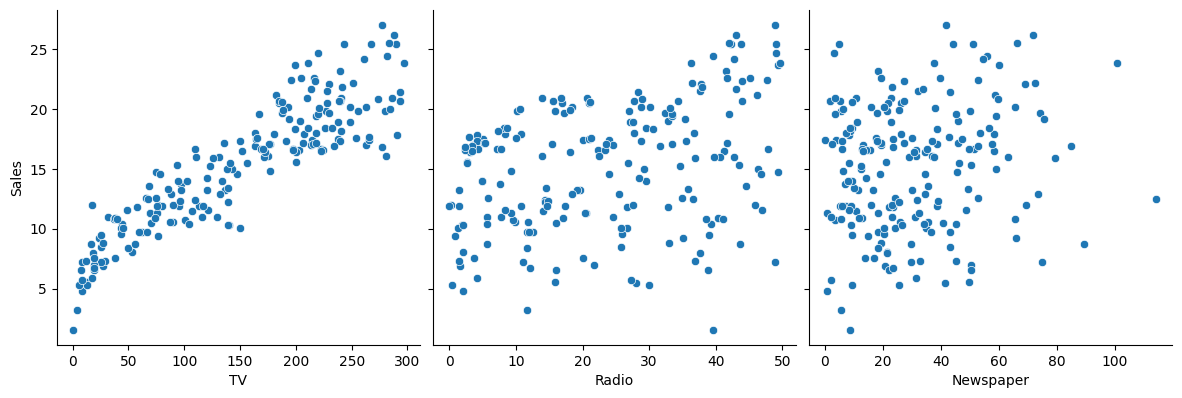

In [ ]:
# first way scatter plot
sns.pairplot(
    df, x_vars = ['TV', "Radio", 'Newspaper'], y_vars = "Sales",
    kind = 'scatter', height = 4
)

Insights

* The TV columns looks much more appropriate

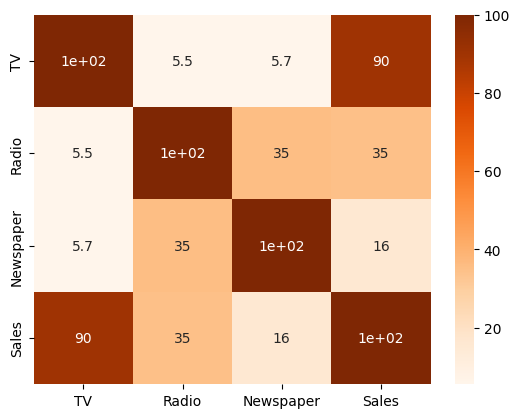

In [ ]:
# heatmap
sns.heatmap(df.corr()*100, cmap = 'Oranges', annot = True)
plt.show()

Insight
* TV seems to be the most relevant columns, hence we will use this columns as our feature column and rest we will ignore

<hr>

# **Step 5 - Model Building**

**Formula: `y = mx + c`**

Breakdown:
* y - response
* c - intercept
* m - coefficient of the feature


**What is going to happen in this code?**

**Formula here: `sales = c + m1 x TV`**

**Train and test split our data**

In [ ]:
# feature data
x = df[['TV']]

# target data
y = df['Sales']

**That the independent features is expected to be passed in 2D, not in 1D. So inorder to do that in this case since we are having a 1D data, we can easily**

In [ ]:
# x = np.array(x).reshape(-1, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

**Model Implementation**

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
TV_coeff = model.coef_
intercept = model.intercept_

In [ ]:
print(f'Value for Intercept: {intercept}\nValue for TV: {TV_coeff[0]}')

Value for Intercept: 6.9453125
Value for TV: 0.0545654296875


value to work with:

**`Sales`: 6.948 + 0.054 * x_train**

**`Sales: c + mx`**

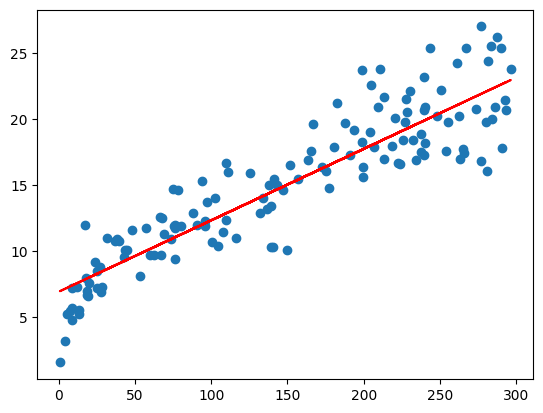

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054 * x_train, 'r')
plt.show()

**Model Building**

In [ ]:
pred = model.predict(x_test)

**Error Part**

In [ ]:
pred_data = pd.DataFrame(columns = ['Actual Data', 'Predictions'])

In [ ]:
pred_data

,Actual Data,Predictions


In [ ]:
pred_data["Actual Data"] = y_test

pred_data['Predictions'] = pred

In [ ]:
pred_data

,Actual Data,Predictions
126,6.601562,7.371094
104,20.703125,19.937500
99,17.203125,14.328125
92,19.406250,18.828125
111,21.796875,20.125000
167,17.203125,18.218750
116,12.203125,14.546875
96,16.703125,17.718750
52,22.593750,18.750000
69,22.296875,18.781250


In [ ]:
pred_data['Error'] = pred_data['Actual Data'] - pred_data['Predictions']

pred_data

,Actual Data,Predictions,Error
126,6.601562,7.371094,-0.769531
104,20.703125,19.937500,0.765625
99,17.203125,14.328125,2.875000
92,19.406250,18.828125,0.578125
111,21.796875,20.125000,1.671875
167,17.203125,18.218750,-1.015625
116,12.203125,14.546875,-2.343750
96,16.703125,17.718750,-1.015625
52,22.593750,18.750000,3.843750
69,22.296875,18.781250,3.515625


<hr>

**Mean Squared Error**

In [ ]:
a = (list((pred_data['Actual Data'] - pred_data['Predictions'])**2))

np.mean(a)

np.float64(4.0759735107421875)

**Evaluation**

In [ ]:
def evaluation(actData, predData):
  # calculate the r2score
  print(f'R2Score: {r2_score(actData, predData)}')

  # calculate MSE
  a = mean_squared_error(actData, predData)
  print(f'MSE: {a}')

  # calculate the RMSE
  print(f'RMSE Value: {np.sqrt(a)}')

  # calculate MAE
  print(f'MAE Value: {mean_absolute_error(actData, predData)}')

In [ ]:
evaluation(y_test, pred)

R2Score: 0.7919921875
MSE: 4.07421875
RMSE Value: 2.018469407744393
MAE Value: 1.6474609375


**Based on the provided metrics:**

1. **Reasonably Good Fit:**
  R-squared score of 0.7921 indicates that the model explains about 79.21% of the variance in the dependent variable. This suggests a reasonably good fit.

2. **Moderate Error:**
  RMSE of 2.0193 and MAE of 1.6481 imply that on average, predictions deviate from the actual values by around 2.02 and 1.65 units, respectively. This suggests moderate error in predictions.

3. **Linear Relationship:**
  The fact that a linear regression model was used successfully implies that there is likely a linear relationship between the independent and dependent variables.

4. **Potential for Improvement:**
  While the model explains a significant portion of the variance, there is still room for improvement as evidenced by the error metrics. Further model tuning or exploration of other model types might be beneficial.
  
5. **Interpretability:**
  Linear regression models are generally easier to interpret compared to more complex models. This can be advantageous for understanding the relationships between variables.
Overall, these metrics suggest that the linear regression model provides a reasonable fit with moderate error. Further analysis and model refinement might be necessary depending on the specific requirements and context.

**Prediction of new data points**

In [ ]:
new_data = [[67.00], [90.00]]

model.predict(new_data)

array([10.60119629, 11.85620117])